In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import sounddevice as sd 
%matplotlib inline  

In [5]:
#laod data and define paremeters
music=np.loadtxt('music.txt')
cd=np.loadtxt('corrupted_speech.txt')
fs=np.loadtxt('fs.txt')
m=music.size
N=corrupted_speech.size
ERLE=[]
M = 100
feedback_p=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [6]:
#fetch feedback parameters from feedback_p
for j in range(0,9):
    u=feedback_p[j]
    step=0.1
    Input=np.zeros((M,m-M+1))
    Disire=np.zeros((M,N-M+1))
    for i in range(0,m-M):
            temp_m= music[i:i+M]
            Input[:, i]= temp_m[::-1]
            temp_cd= cd[i:i+M]
            Disire[:, i]= temp_cd[::-1]
            #pre process the inpute data
            for k in range(0,M-1):
                if i==0 or k==0:
                    continue
                else:
                    Input[k,i]=(1-u)*Input[k,i-1]+u*Input[k-1,i-1]
    w=np.zeros((M,m-M+1)) 
    weight_t=np.zeros((M,m-M+1))
    y=np.zeros((1,m-M+1)) 
    error=np.zeros((1,m-M+1))
    for _ in range(20):
        for i in range(0,m-M):
            y[0, i]=w[:,i].T@Input[:,i]
            error[0,i]=Disire[0,i]-y[0,i]
            w[:,i+1]=w[:,i]+2*step*error[0,i]*Input[:,i]/(Input[:,i].T@Input[:,i])
            weight_t[:,i]=w[:,i+1]
            w[:,i]=weight_t[:,i]
        J=1/(2*(m-M+1))*error**2
        D=Disire[0,:]**2
        E=error[0,:]**2
        d=np.sum(D)
        e=np.sum(E)
    ERLE.append(10*math.log10(d/e))
    print(u)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


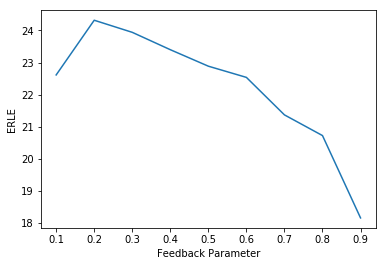

In [8]:
x = np.arange(0.1,0.91,0.1)
plt.plot(x,ERLE)
plt.xlabel('Feedback Parameter')
plt.ylabel('ERLE')

In [13]:
sd.play(error[0,:],fs)